In [1]:
# Importing libraries
import numpy as np
from numpy import nan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, date, time
from sklearn.preprocessing import LabelEncoder, OneHotEncoder 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error 

sns.set_style("darkgrid")

In [2]:
# Reading in the data
df_auto = pd.read_csv("Automobile.csv")
df_auto.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
normalized_losses,168,168,168,164,164
make,alfa-romero,alfa-romero,alfa-romero,audi,audi
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
number_of_doors,two,two,two,four,four
body_style,convertible,convertible,hatchback,sedan,sedan
drive_wheels,rwd,rwd,rwd,fwd,4wd
engine_location,front,front,front,front,front
wheel_base,88.6,88.6,94.5,99.8,99.4


In [3]:
# Shape of the data
df_auto.shape

(201, 26)

In [4]:
# Summary stats
df_auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            201 non-null    int64  
 1   normalized_losses    201 non-null    int64  
 2   make                 201 non-null    object 
 3   fuel_type            201 non-null    object 
 4   aspiration           201 non-null    object 
 5   number_of_doors      201 non-null    object 
 6   body_style           201 non-null    object 
 7   drive_wheels         201 non-null    object 
 8   engine_location      201 non-null    object 
 9   wheel_base           201 non-null    float64
 10  length               201 non-null    float64
 11  width                201 non-null    float64
 12  height               201 non-null    float64
 13  curb_weight          201 non-null    int64  
 14  engine_type          201 non-null    object 
 15  number_of_cylinders  201 non-null    obj

In [5]:
# Summary stats
df_auto.describe(include ="all").transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
symboling,201.0,NaN,NaN,NaN,0.840796,1.254802,-2.0,0.0,1.0,2.0,3.0
normalized_losses,201.0,NaN,NaN,NaN,125.189055,33.572966,65.0,101.0,122.0,150.0,256.0
make,201,22,toyota,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type,201,2,gas,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN
aspiration,201,2,std,165,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number_of_doors,201,2,four,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN
body_style,201,5,sedan,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN
drive_wheels,201,3,fwd,118,NaN,NaN,NaN,NaN,NaN,NaN,NaN
engine_location,201,2,front,198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wheel_base,201.0,NaN,NaN,NaN,98.797015,6.066366,86.6,94.5,97.0,102.4,120.9


In [6]:
# Columns
df_auto.columns

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'number_of_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')

In [7]:
# Object columns
for_c = ['make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type','number_of_cylinders']
dest =  df_auto['make'].value_counts().count()
print("number of makers of cars in the dataset is: ", dest)
print("number of fuel types present in the dataset:", df_auto["fuel_type"].value_counts().count())
print("number of aspiration types:", df_auto["aspiration"].value_counts().count())
print("total number of door types", df_auto["number_of_doors"].value_counts().count())
print("number of car body types", df_auto["body_style"].value_counts().count())
print("number of different drive wheel types", df_auto["drive_wheels"].value_counts().count())
print("Number of engine locations", df_auto["engine_location"].value_counts().count())
print("number of the diffrent types of engines", df_auto["engine_type"].value_counts().count())
print("numberof total cylinders", df_auto["number_of_cylinders"].value_counts().count())

number of makers of cars in the dataset is:  22
number of fuel types present in the dataset: 2
number of aspiration types: 2
total number of door types 2
number of car body types 5
number of different drive wheel types 3
Number of engine locations 2
number of the diffrent types of engines 6
numberof total cylinders 7


In [8]:
# A look at Toyota percentage in the dataset
total = df_auto.make.value_counts()
per = total[0]/sum(total)*100
print("Toyota amounts for", f"{per}%")
total

Toyota amounts for 15.92039800995025%


toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
plymouth          7
audi              6
saab              6
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
isuzu             2
renault           2
mercury           1
Name: make, dtype: int64

In [9]:
df_auto[df_auto["price"]>=20500]
df_auto[df_auto["make"]>="toyota"]

,symboling,normalized_losses,make,fuel_type,aspiration,number_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
146,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,35,39,5348
147,1,87,toyota,gas,std,two,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6338
148,1,74,toyota,gas,std,four,hatchback,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,38,6488
149,0,77,toyota,gas,std,four,wagon,fwd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,31,37,6918
150,0,81,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,7898
151,0,91,toyota,gas,std,four,wagon,4wd,front,95.7,...,92,2bbl,3.05,3.03,9.0,62,4800,27,32,8778
152,0,91,toyota,gas,std,four,sedan,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,6938
153,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198
154,0,91,toyota,diesel,std,four,sedan,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,34,36,7898
155,0,91,toyota,diesel,std,four,hatchback,fwd,front,95.7,...,110,idi,3.27,3.35,22.5,56,4500,38,47,7788


#### Data visualization

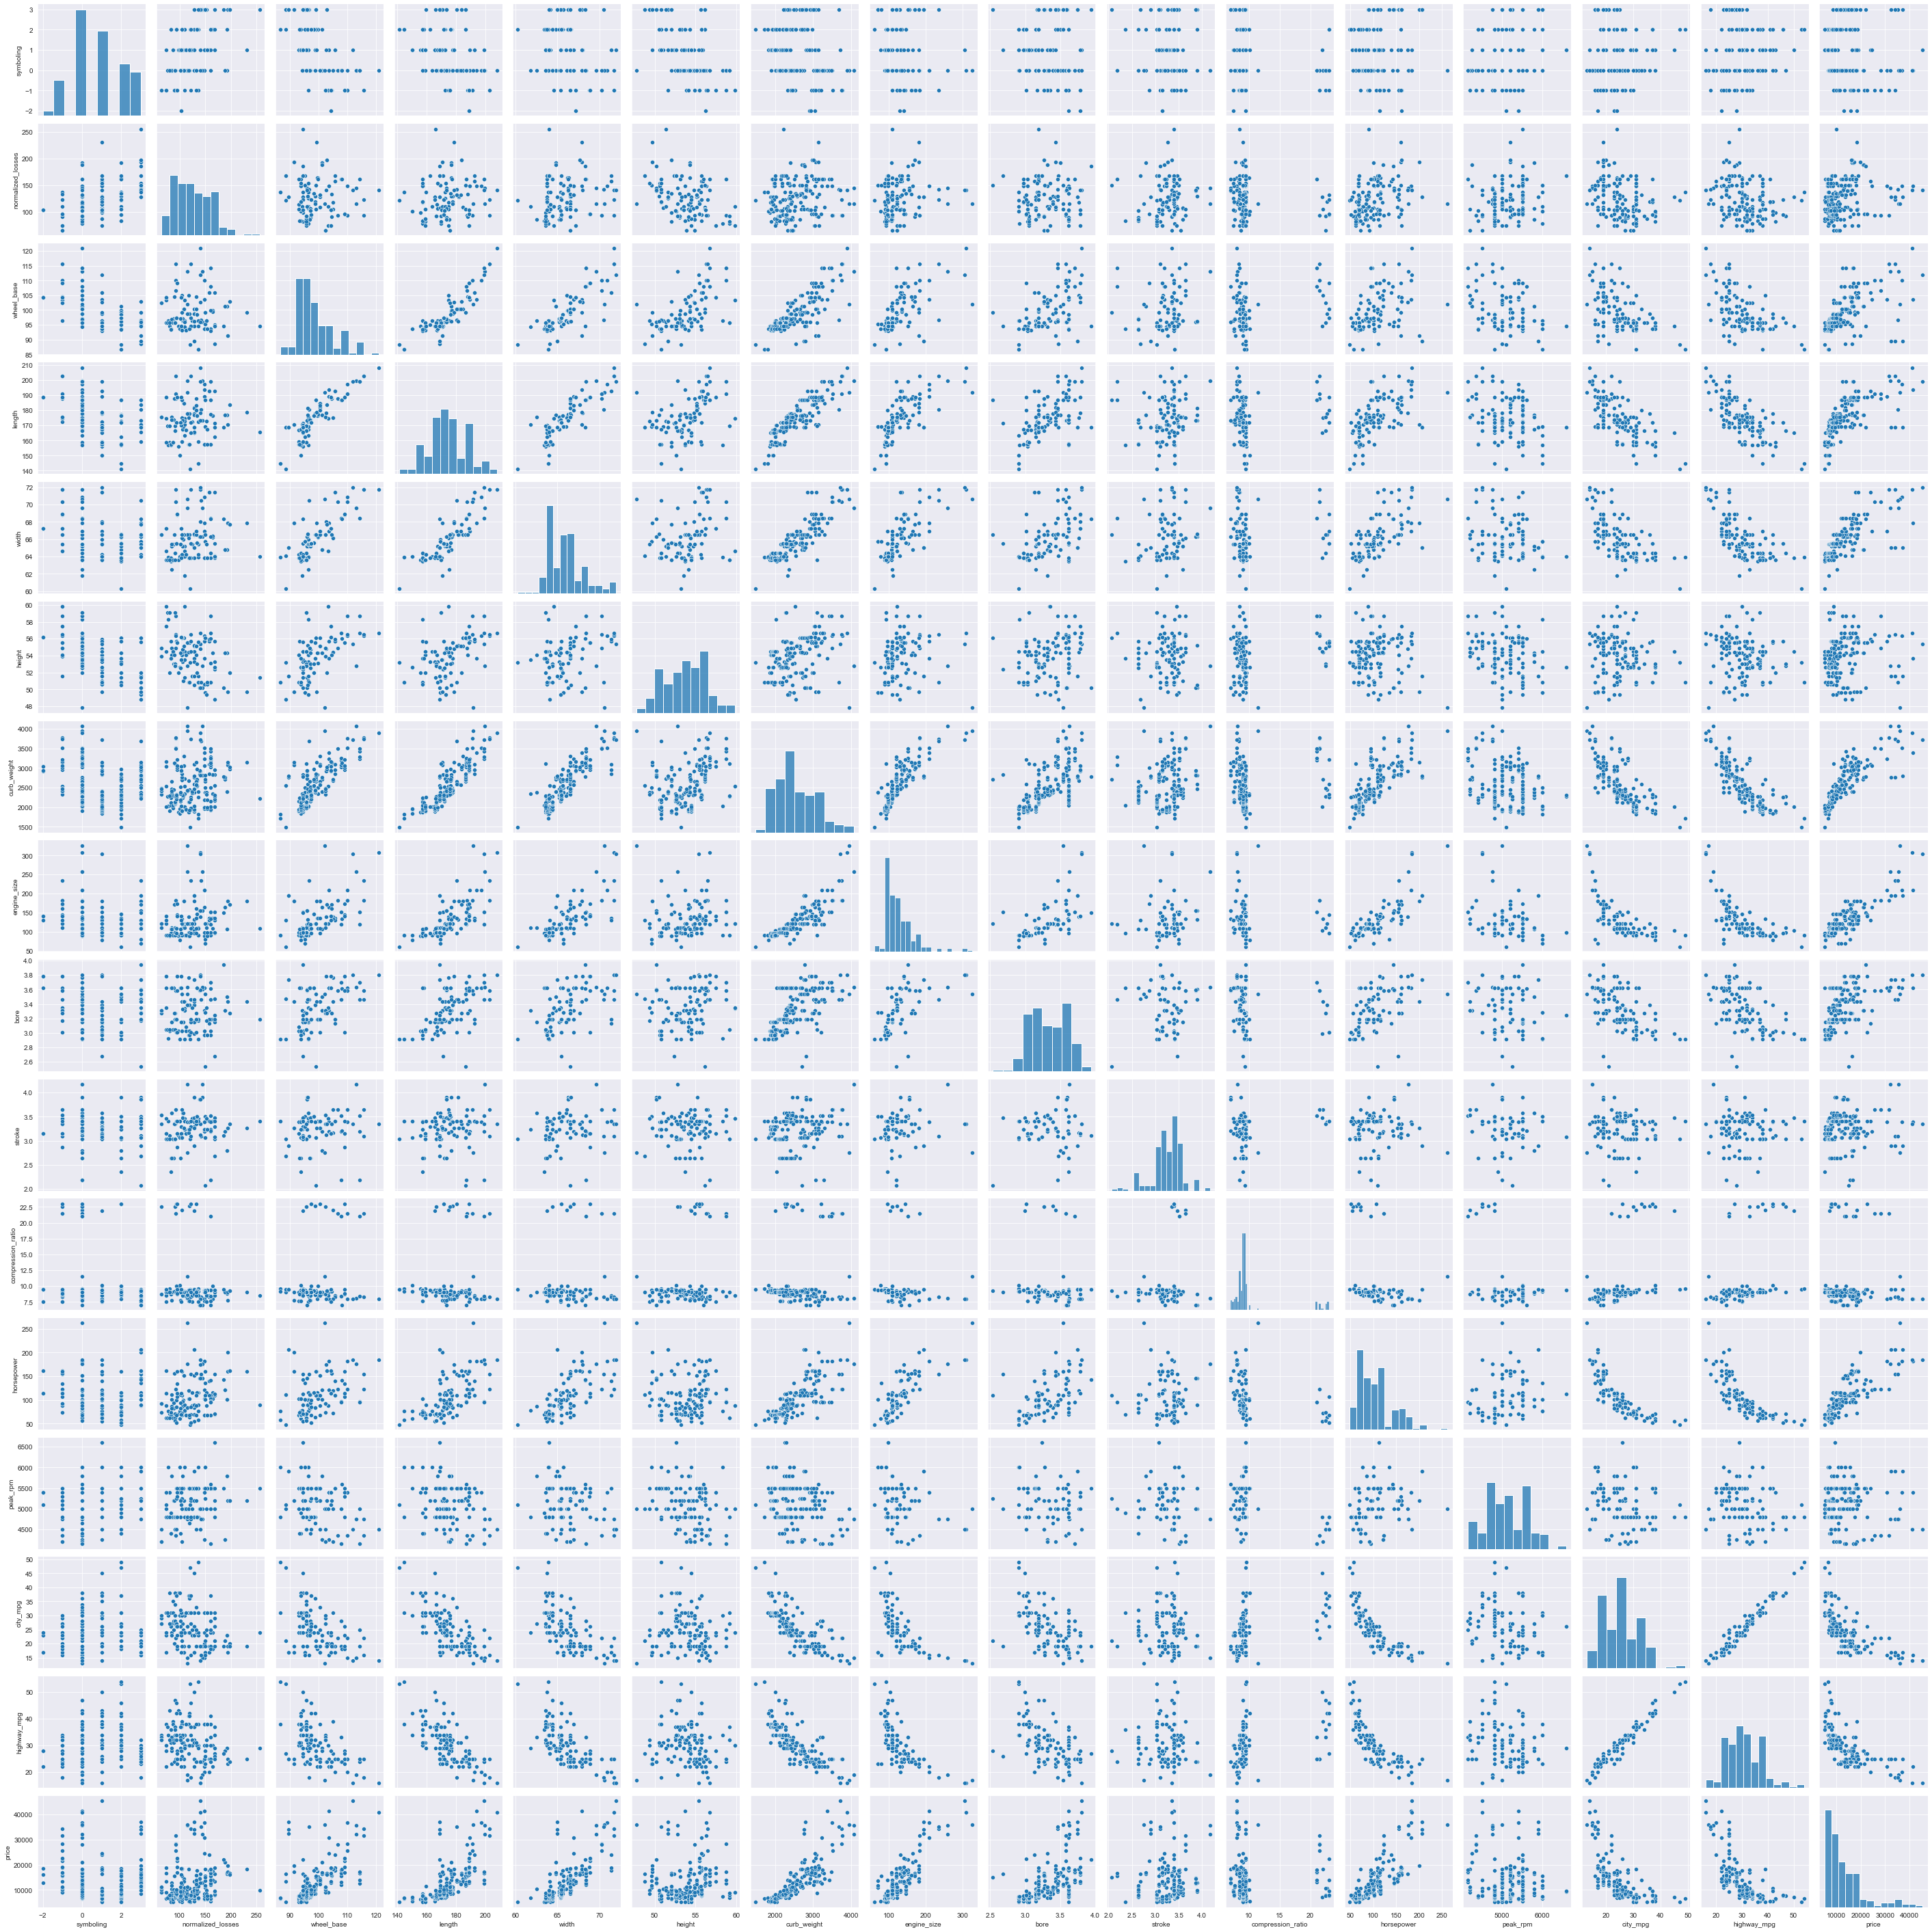

In [10]:
# Pair plot 
sns.pairplot(df_auto)

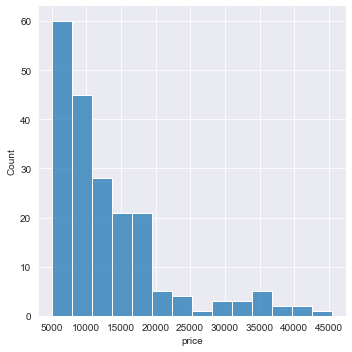

In [36]:
# Price distribution
sns.displot(df_auto['price'])
plt.show()

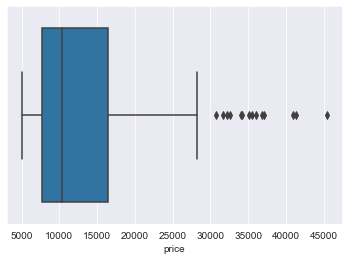

In [12]:
# Price distrution with boxplot
sns.boxplot(x = "price", data = df_auto)
plt.show()

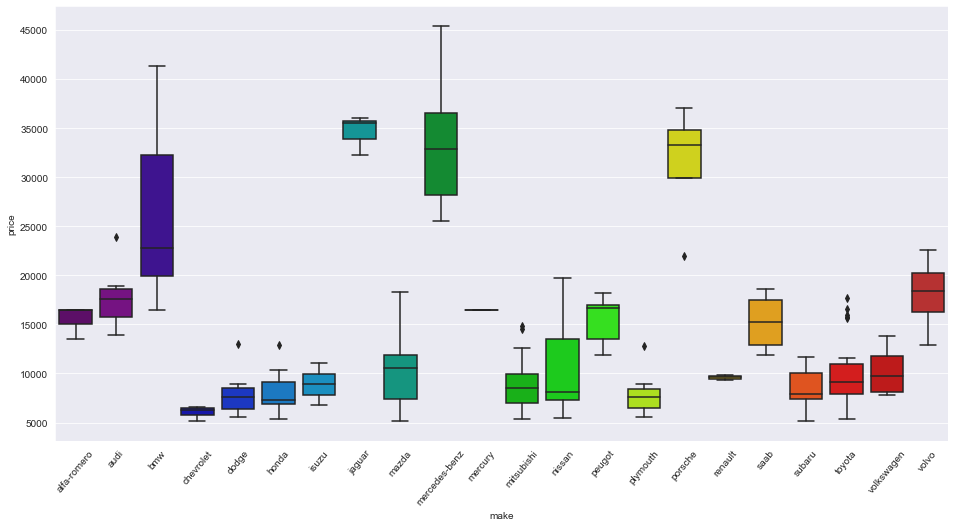

In [13]:
# Price by make distrution with boxplot
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "make", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

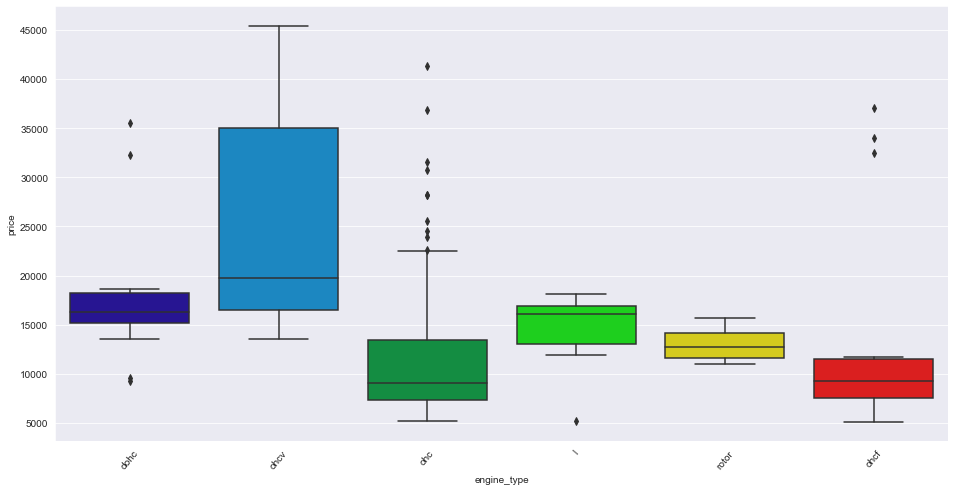

In [14]:
# Price by engine type distrution with boxplot
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "engine_type", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

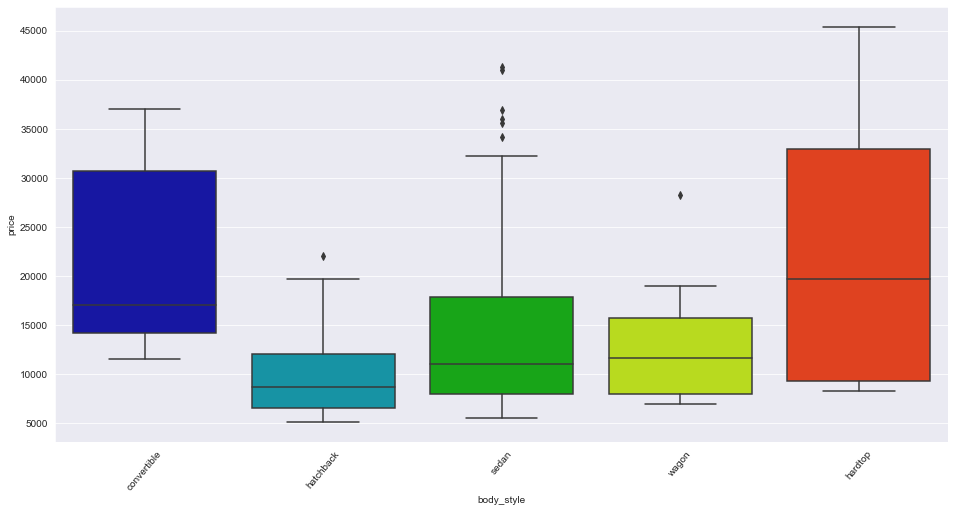

In [15]:
plt.figure(figsize = (16, 8))
make_pt = sns.boxplot(x = "body_style", y = "price", data = df_auto, palette = "nipy_spectral")
make_pt.set_xticklabels(make_pt.get_xticklabels(), rotation=50);

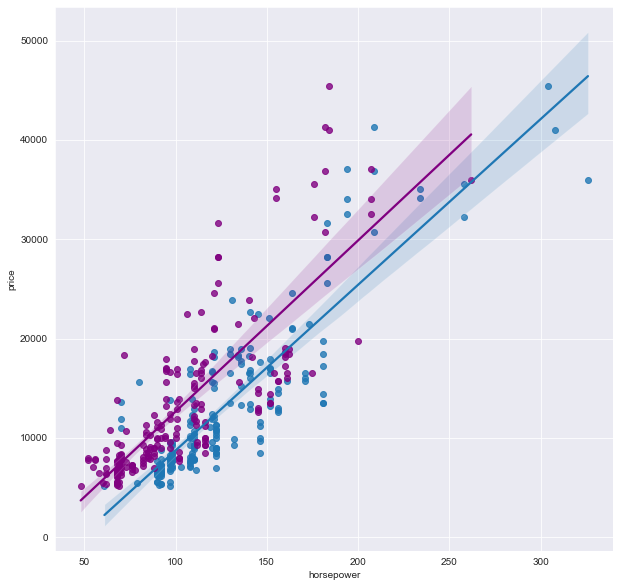

In [16]:
# Price by engine and horse powwer plot
plt.figure(figsize = (10, 10))
sns.regplot(x="engine_size", y = "price", data = df_auto)
sns.regplot(x = "horsepower", y = "price", data = df_auto, color = "purple")
plt.show()

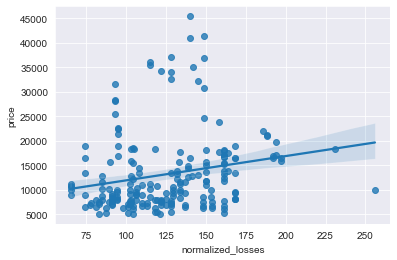

In [17]:
sns.regplot(x= "normalized_losses", y = "price", data =df_auto)
plt.show()

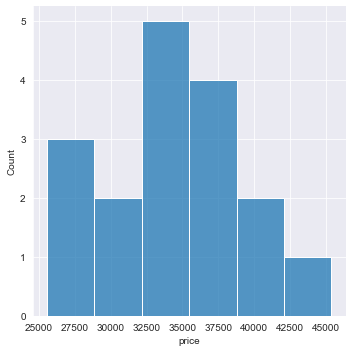

In [37]:
# A look at price distribution above 25000
df4 = df_auto.loc[(df_auto["price"]> 25000)]
sns.displot(df4.price)
plt.show()

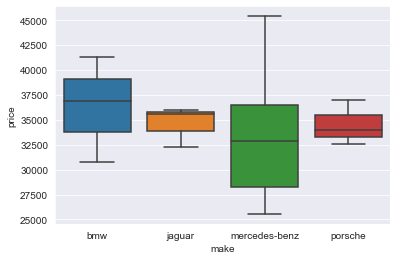

In [19]:
# A look at price by make distribution above 25000
sns.boxplot(x = "make", y = "price", data = df4)
plt.show()

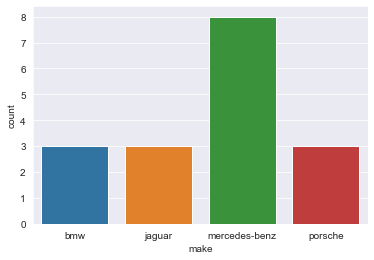

In [38]:
# A look at make with price above 25000
sns.countplot(x = df4.make)
plt.show()

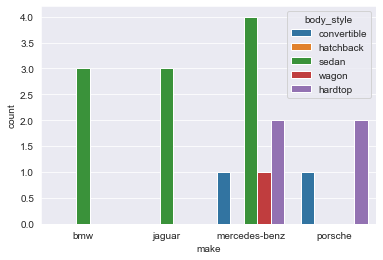

In [39]:
sns.countplot(x = df4["make"], hue = df_auto.body_style)
plt.show()

#### preprocessing

In [22]:
# Encoding columns for the model
make = LabelEncoder()
fuel_type = LabelEncoder()
aspiration = LabelEncoder()
num_doors = LabelEncoder()
body_style = LabelEncoder()
drive_wheels = LabelEncoder()
engine_location = LabelEncoder()
engine_type = LabelEncoder()
cylinder_num = LabelEncoder()
fuel_system = LabelEncoder()

df_auto["make_n"] = make.fit_transform(df_auto["make"])
df_auto["fuel_type_n"] = fuel_type.fit_transform(df_auto["fuel_type"])
df_auto["aspiration_n"] = aspiration.fit_transform(df_auto["aspiration"])
df_auto["number_of_doors_n"] = num_doors.fit_transform(df_auto["number_of_doors"])
df_auto["body_style_n"] = body_style.fit_transform(df_auto["body_style"])
df_auto["drive_wheels_n"] = drive_wheels.fit_transform(df_auto["drive_wheels"])
df_auto["engine_location_n"] = engine_location.fit_transform(df_auto["engine_location"])
df_auto["engine_type_n"] = engine_type.fit_transform(df_auto["engine_type"])
df_auto["number_of_cylinders_n"] = cylinder_num.fit_transform(df_auto["number_of_cylinders"])
df_auto["fuel_system_n"] = fuel_system.fit_transform(df_auto["fuel_system"])

In [23]:
# Dropping volumns
df_n = df_auto.drop(["make", "fuel_type", "aspiration", "number_of_doors", "body_style", "drive_wheels", "engine_location", "engine_type", "number_of_cylinders", "fuel_system"], axis = "columns")

# A look at the newly encoded data
df_n

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,...,make_n,fuel_type_n,aspiration_n,number_of_doors_n,body_style_n,drive_wheels_n,engine_location_n,engine_type_n,number_of_cylinders_n,fuel_system_n
0,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
1,3,168,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,1,0,1,0,2,0,0,2,5
2,1,168,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,1,2,2,0,4,3,5
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1,1,0,0,3,1,0,2,2,5
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,1,1,0,0,3,0,0,2,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,21,1,0,0,3,2,0,2,2,5
197,-1,95,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,21,1,1,0,3,2,0,2,2,5
198,-1,95,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,21,1,0,0,3,2,0,4,3,5
199,-1,95,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,21,0,1,0,3,2,0,2,3,3


In [24]:
# Creating X & y
X = df_n.drop("price", axis = 1)
y = df_n["price"]

# A look at the shape
print(X.shape)
print(y.shape)

(201, 25)
(201,)


In [25]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 43)

## building the models
#### Model 1 (Linear Regression)

In [26]:
# Instatiating Linear regression
L = LinearRegression()

In [27]:
# Fitting the training data
L.fit(X_train, y_train)

LinearRegression()

In [28]:
# Making predictions with the test data
y_pred = L.predict(X_test)

In [29]:
# A look at model performance using Mean absolute error and Score
price_mae = mean_absolute_error(y_test, y_pred)
print("The mean absolute error for the linear regression model" ,f"{price_mae}")
print("The score for the linear regression model" ,f"{L.score(X_test, y_test)}")

The mean absolute error for the linear regression model 2843.0690505836706
The score for the linear regression model 0.7839032250842077


#### Model 2 (Decision Tree)

In [40]:
# Creating a function to return the mean absolute error
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(X_train, y_train)
    preds_val = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds_val)
    return(mae)

# A loop to get the best max leaf node and mae
for max_leaf_nodes in[5,40, 45, 50]:
    best_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, best_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  2709
Max leaf nodes: 40  		 Mean Absolute Error:  2405
Max leaf nodes: 45  		 Mean Absolute Error:  2377
Max leaf nodes: 50  		 Mean Absolute Error:  2438


In [32]:
# Appplying the results from the test above
Dt = DecisionTreeRegressor(max_leaf_nodes =45, random_state = 10) 
Dt.fit(X_train, y_train)
D_predict = Dt.predict(X_test)
print("The score for the Decision Tree model", f"{Dt.score(X_test, y_test)}")

# Conclusion

As seen in the two models above, the Decision tree has a better score (0.82) and Mean absolute error (2438) compared to the linear regression with score (0.78) and Mean absolute error (2843). However there wasn't too much feature engineering, data cleaning and prerocessing done therefore there could be better models to be built than these two.